In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt
import tensorflow

In [2]:
!pip install gensim
!pip install xlrd==1.2.0
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#Data Reading

In [4]:
train_data = pd.read_excel('/content/1804037_Suhana_Dataset.xlsx')
#train_data.head()

#Cohen Kappa Value Calculation

In [5]:
from sklearn.metrics import cohen_kappa_score
  # Load your dataset

# Convert 'Rate1' and 'Rate2' columns to string data type
train_data['Rate1'] = train_data['Rate1'].astype(str)
train_data['Rate2'] = train_data['Rate2'].astype(str)

# Get the actual values from the 'Rate1' and 'Rate2' columns
y_true = train_data['Rate1']
y_pred = train_data['Rate2']

# Compute Cohen's Kappa score
kappa = cohen_kappa_score(y_true, y_pred)

print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.8790542422387796


#Data Analysing and Visualisation




In [6]:
train_data.info() # Basic Information
print("\nShape: ",train_data.shape) # Shape of data
print("\nChecking for missing values")
train_data.isnull().sum()# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rate1   3051 non-null   object
 1   Rate2   3051 non-null   object
 2   Text    3051 non-null   object
dtypes: object(3)
memory usage: 71.6+ KB

Shape:  (3051, 3)

Checking for missing values


Rate1    0
Rate2    0
Text     0
dtype: int64

In [7]:
for i in range (5):
    print(train_data.Text[i])
    print("========================================")

মানুষ যত অন্যের বিপদে পাশে থাকবে,সেটা সমাধানের দায়িত্ত্ব নিবে তার ভেতর থেকে ততই অলৌকিক প্রশান্তি আসবে ও ডিপ্রেসন কেটে যাবে। পাশাপাশি সে স্রষ্ঠার প্রতি ও কৃতজ্ঞ ও থাকবে যে এইরকম বিপদে তিনি পড়েন নাই বা বুঝতে পারবে তার চেয়েও অনেক মানুষ অনেক কঠিন সমস্যার মাঝে আছে। ইসলাম একটি পূর্ণাঙ্গ জীবন ব্যবস্থা।
অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ও বোনদের কে হেফাজত করুন মহান আল্লাহ তাআলা
ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় বোমা হামলা 
মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা, রক্তাক্ত আল-আকসা
এটা ঠিকনা,,,যে যেই ধর্মেরই হোকনা কেনো,,,কখনো ঈশ্বরের কাছে প্রার্থনা করার সময় কোনো মানুষের গায়ে আঘাত করা তো দুরের কথা গায়ে স্পর্শ করারও পাপ,,,সেখানে এই অবস্থা,,, মানুষ এভাবে পৃথিবী থেকে মনুষ্যত্ব কে হারিয়ে ফেলছে


In [8]:
train_data['Rate2'].unique()

array(['NoAg', 'vndlsm', 'hate', 'lifeth'], dtype=object)

In [9]:
print("Count of sentiment wise values: \n",train_data.Rate2.value_counts())

Count of sentiment wise values: 
 Rate2
NoAg      1040
hate       807
vndlsm     667
lifeth     537
Name: count, dtype: int64


In [10]:
fig=px.histogram(train_data,
                x='Rate2',
                title='Sentiment Count ',
                color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()


In [11]:
fig = px.pie(train_data, names='Rate2',title="Sentiment Distribution")
fig.show()

#Text Lenght

In [12]:
##Function to extract the tweet length
def text_length(tweet):
    str_len=len(tweet.split(" "))
    return(str_len)
train_data['Text_length']= train_data['Text'].apply(lambda x:text_length(x))
train_data.head()

,Rate1,Rate2,Text,Text_length
0,NoAg,NoAg,"মানুষ যত অন্যের বিপদে পাশে থাকবে,সেটা সমাধানের...",51
1,NoAg,NoAg,অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ...,15
2,vndlsm,vndlsm,ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় ব...,11
3,vndlsm,vndlsm,"মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা, রক্ত...",8
4,hate,hate,"এটা ঠিকনা,,,যে যেই ধর্মেরই হোকনা কেনো,,,কখনো ঈ...",33


In [13]:
train_data['Text_length'].describe()

count    3051.000000
mean       29.080957
std        12.884544
min         4.000000
25%        20.000000
50%        27.000000
75%        36.000000
max       106.000000
Name: Text_length, dtype: float64

In [14]:
import plotly.express as px

# Assuming train_data is your DataFrame and 'Text_length' is a column in it

fig = px.histogram(train_data,
                   x='Text_length',
                   marginal='box',
                   title="Length of original tweets")

# Update layout to reduce figure size
fig.update_layout(
    bargap=0.1,
    width=600,  # Set the desired width
    height=400  # Set the desired height
)

fig.show()

In [15]:
X_train = train_data['Text']

In [16]:
#vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern='[\u0980-\u09FF]+')
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

(3051, 16783)

In [17]:
#checking
# Sum up the counts of each vocabulary word
sum_words = X_train_data.sum(axis=0)  # This sums each column of the matrix


In [18]:
#checking
# Connect the sums with the corresponding words
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]


In [19]:
#checking
# Sort words by their frequency
sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


In [20]:
#checking
# Display the top 10 most frequent words
for word, freq in sorted_words_freq[:5]:
    print(word, freq)


করে 1514
এবং 1002
ও 991
করা 849
হিন্দু 815


In [21]:
len(sorted_words_freq)

16783

In [22]:
# fig = px.histogram(train_data,
#                   x='Text_length',
#                   marginal='box',
#                   title="Length of original tweets")
# fig.update_layout(bargap=0.1)
# fig.show()

#Data Cleaning

In [23]:
# import warnings
# warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [24]:
# Test importing the layers
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

In [25]:
!pip install unidecode
#!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.2 MB/s eta 0:00:00


In [26]:
from pandas import read_excel
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time
from collections import Counter

from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, MaxPooling1D, Conv1D
from tensorflow.keras.models import Sequential

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


**Removing Null Values**

In [27]:
df_train = train_data
df_train.dropna(inplace=True)
#df_test.dropna(inplace=True)

**Removing Low Length Data**

In [28]:
#counting text length
df_train['Text_count'] = df_train['Text'].str.split().str.len()
#df_test['count'] = df_test['cleanText'].str.split().str.len()

# Remove the text with words less than 5
df_train= df_train.loc[df_train['Text_count']>5]
#df_test= df_test.loc[df_test['count']>5]
#df_train.head()

**Preprocessing/Cleaning**

In [29]:
import re
from collections import OrderedDict


In [30]:
# def text_to_word_list(text):
#     text = text.split()
#     return text

def text_to_word_list(text):
    text = text.split()
    text = list(OrderedDict.fromkeys(text))# Remove duplicates while preserving order
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
        #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else:
          no_punct = no_punct + " "
    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    out = text_to_word_list(out)
    return joining(out)

In [31]:
df_train['cleanText'] = df_train['Text']
#df_train.head()

<ipython-input-31-3ff9df03583e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_train['cleanText'] = df_train.cleanText.apply(lambda x: preprocessing(str(x)))
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: preprocessing(str(x)))
df_train.head()

<ipython-input-32-c8b31c3adf4b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rate1,Rate2,Text,Text_length,Text_count,cleanText
0,NoAg,NoAg,"মানুষ যত অন্যের বিপদে পাশে থাকবে,সেটা সমাধানের...",51,51,মানুষ যত অন্যের বিপদে পাশে থাকবে সেটা সমাধানের...
1,NoAg,NoAg,অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ...,15,15,অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ...
2,vndlsm,vndlsm,ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় ব...,11,10,ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় ব...
3,vndlsm,vndlsm,"মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা, রক্ত...",8,8,মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা রক্তা...
4,hate,hate,"এটা ঠিকনা,,,যে যেই ধর্মেরই হোকনা কেনো,,,কখনো ঈ...",33,33,এটা ঠিকনা যে যেই ধর্মেরই হোকনা কেনো কখনো ঈশ্বর...


In [33]:
data1 =pd.read_excel('/content/stopwords_bangla.xlsx')
stop = data1['words'].tolist()
#print(stop)
data1.head()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ


In [34]:
def stopwordRemoval(cleantext):
    x=str(cleantext)
    l=x.split()
    stm=[elem for elem in l if elem not in stop]
    out=' '.join(stm)
    return str(out)

In [35]:
df_train['cleanText'] = df_train['cleanText'].apply(lambda x: stopwordRemoval(str(x)))
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

df_train.head()

<ipython-input-35-31c601a57f4c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rate1,Rate2,Text,Text_length,Text_count,cleanText
0,NoAg,NoAg,"মানুষ যত অন্যের বিপদে পাশে থাকবে,সেটা সমাধানের...",51,51,অন্যের বিপদে সমাধানের দায়িত্ত্ব নিবে ভেতর ততই...
1,NoAg,NoAg,অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ...,15,15,অভিশপ্ত ইয়াহুদী জাতির হাত ফিলিস্তিনের মা বোনদে...
2,vndlsm,vndlsm,ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় ব...,11,10,ফিলিস্তিন মসজিদ আজান অবস্তায় বোমা হামলা
3,vndlsm,vndlsm,"মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা, রক্ত...",8,8,মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা রক্তা...
4,hate,hate,"এটা ঠিকনা,,,যে যেই ধর্মেরই হোকনা কেনো,,,কখনো ঈ...",33,33,ঠিকনা যেই ধর্মেরই হোকনা কেনো কখনো ঈশ্বরের প্রা...


In [36]:
def text_length(cleanText):
    str_len=len(cleanText.split(" "))
    return(str_len)

df_train['cleanText_length']= df_train['cleanText'].apply(lambda x:text_length(x))
df_train.head()

<ipython-input-36-de0346a115e6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rate1,Rate2,Text,Text_length,Text_count,cleanText,cleanText_length
0,NoAg,NoAg,"মানুষ যত অন্যের বিপদে পাশে থাকবে,সেটা সমাধানের...",51,51,অন্যের বিপদে সমাধানের দায়িত্ত্ব নিবে ভেতর ততই...,27
1,NoAg,NoAg,অভিশপ্ত ইয়াহুদী জাতির হাত থেকে ফিলিস্তিনের মা ...,15,15,অভিশপ্ত ইয়াহুদী জাতির হাত ফিলিস্তিনের মা বোনদে...,11
2,vndlsm,vndlsm,ফিলিস্তিন এর একটি মসজিদ এ আজান দেওয়া অবস্তায় ব...,11,10,ফিলিস্তিন মসজিদ আজান অবস্তায় বোমা হামলা,6
3,vndlsm,vndlsm,"মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা, রক্ত...",8,8,মসজিদে ঢুকে ইসরায়েলি বাহিনীর বর্বর হামলা রক্তা...,9
4,hate,hate,"এটা ঠিকনা,,,যে যেই ধর্মেরই হোকনা কেনো,,,কখনো ঈ...",33,33,ঠিকনা যেই ধর্মেরই হোকনা কেনো কখনো ঈশ্বরের প্রা...,22


**Stemming**

In [37]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [38]:
df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth ru

<ipython-input-38-2931bd5ddb6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#train_data.head()


In [40]:
#df_train.head()

In [41]:
train_data = df_train
#train_data.head()

In [42]:
# cleanedTrain_data = train_data
# cleanedTrain_data['Text'] = train_data['cleanText']

In [43]:
# Save the cleaned dataset
# cleanedTrain_data.to_csv('cleanedTrain_data.csv', index=False)
# from google.colab import files
# files.download('cleanedTrain_data.csv')


#Train Val Test

In [44]:
np.random.seed(112)
df = train_data
df_train, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df))])

print(len(df_train), len(df_test))

2436 609


In [45]:
X_train = df_train.Text
Y_train = df_train.Rate2

Y_train.shape


(2436,)

In [46]:
Y_train.head()

1287    vndlsm
643       hate
1147      hate
1279      NoAg
1940    vndlsm
Name: Rate2, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
#encoder.classes_

In [49]:
#Y_train.head()

In [50]:
Y_train = pd.DataFrame(Y_train,columns=['Rate2'])
Y_train.head()

,Rate2
0,3
1,1
2,1
3,0
4,3


In [51]:
X_test = df_test.Text
Y_test = df_test.Rate2

In [52]:
#X_test.head()


In [53]:
#Y_test.head()

In [54]:
#Validation data ready
# X_val = df_val.Text
# Y_val = df_val.Rate2

# Y_val = encoder.fit_transform(Y_val)
# Y_val = pd.DataFrame(Y_val,columns=['Rate2'])
# Y_val.head()

In [55]:
Y_test = encoder.fit_transform(Y_test)

In [56]:
Y_test = pd.DataFrame(Y_test,columns=['Rate2'])
Y_test.head()

,Rate2
0,0
1,0
2,3
3,0
4,1


#Feature Extraction

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
#vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
vectorizer = CountVectorizer(token_pattern='[\u0980-\u09FF]+')
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

(2436, 14655)

In [59]:
#checking
# Sum up the counts of each vocabulary word
sum_words = X_train_data.sum(axis=0)  # This sums each column of the matrix


In [60]:
#checking
# Connect the sums with the corresponding words
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]


In [61]:
#checking
# Sort words by their frequency
sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


In [62]:
#checking
# Display the top 10 most frequent words
for word, freq in sorted_words_freq[:5]:
    print(word, freq)


করে 1211
এবং 784
ও 782
করা 670
হিন্দু 646


In [63]:
# X_train = [
#     "আমি বাংলা বই পড়ি",
#     "তুমি কি বাংলা বই পড়ো",
#     "আমি বাংলা গান শুনি",
#     "সে বাংলা ছবি দেখে"
# ]

In [64]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(token_pattern='[\u0980-\u09FF]+')
# X_train_data = vectorizer.fit_transform(X_train)

# words_freq = [(word, X_train_data.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
# sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
# print(sorted_words_freq)


In [65]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# X_train_data = vectorizer.fit_transform(X_train_s)

# # Summing up the counts of each vocabulary word
# sum_words = X_train_data.sum(axis=0)
# words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
# sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
# print(sorted_words_freq)


ager gula

In [66]:
#check on validation
#X_val_data = vectorizer.fit_transform(X_val)

In [67]:

X_test_data = vectorizer.fit_transform(X_test)
X_train_data.shape

(2436, 14655)

In [68]:
#x_test_data.shape

In [69]:
Y_train.shape

(2436, 1)

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
#TFidf
transformer = TfidfTransformer()
X_train_data = transformer.fit_transform(X_train_data).toarray()

print(X_train_data.shape)
#X_train_data[0]

(2436, 14655)


In [72]:
Y_train.head()

,Rate2
0,3
1,1
2,1
3,0
4,3


**Naive Bayes Multinomial Classifier**

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [74]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_data, Y_train, test_size=0.33,random_state = 15)

In [75]:
#ModelCalling
model1_nb = MultinomialNB()

y_train_pred = model1_nb.fit(X1_train,y1_train.Rate2).predict(X1_train)
y_pred = model1_nb.predict(X1_test)

# comparing actual response values  with predicted response values
from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy(in %):", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy(in %):", metrics.accuracy_score(y1_test, y_pred)*100)

Multinomial Naive Bayes model train accuracy(in %): 85.60049019607843
Multinomial Naive Bayes model test accuracy(in %): 55.59701492537313


In [76]:
#mine
y_pred_mnb = model1_nb.fit(X_train_data, Y_train .Rate2).predict(X_train_data)
#y_pred = model1_nb.predict(X1_test)

In [77]:
#Y_predict = model1_nb.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
precision = precision_score(y1_test, y_pred, average='weighted')
recall = recall_score(y1_test, y_pred, average='weighted')
f1 = f1_score(y1_test, y_pred, average='weighted')

print("Precision (weighted): ", precision)
print("Recall (weighted): ", recall)
print("F1-Score (weighted): ", f1)

Precision (weighted):  0.6076301923084471
Recall (weighted):  0.5559701492537313
F1-Score (weighted):  0.5225590018722989


In [79]:
#print(Y_train)

**HyperParameter Tuning**

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# params = {'alpha': [0.01, 0.1, 0.5, 1, 10],
#          }
# multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# multinomial_nb_grid.fit(X_train_data,Y_train)
# print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_train, y1_train))
# #print('Validation Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(Val, y1_train))
# print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_test, y1_test))
# print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
# print('Best Parameters : ',multinomial_nb_grid.best_params_)

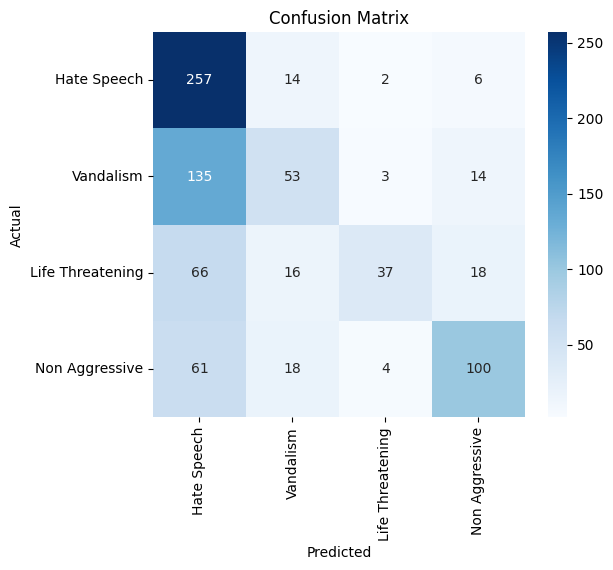

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y1_test are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y1_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Vandalism", "Life Threatening", "Non Aggressive"],
            yticklabels=["Hate Speech", "Vandalism", "Life Threatening", "Non Aggressive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()




In [83]:

# from sklearn.metrics import confusion_matrix, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns


In [84]:
# # Predicting the Test set results
# y_pred = gboost_m.predict(X1_test)

# # Generating the confusion matrix
# cm = confusion_matrix(y1_test, y_pred)

# # Visualizing the confusion matrix using seaborn
# plt.figure(figsize=(10,7))
# labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap='Blues', cbar=False)
# #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix for Gradient Boosting Model')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()


**Gradient Boosting Classifier**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gboost_m = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
train_pred = gboost_m.fit(X1_train,y1_train.Rate2).predict(X1_train)
prediction = gboost_m.score(X1_test,y1_test )
print("Gradient Boosting model train accuracy( in % ): ",accuracy_score(y1_train, train_pred)*100 )
print("Gradient Boosting model test accuracy( in % ): ", prediction*100)

Gradient Boosting model train accuracy( in % ):  68.50490196078431
Gradient Boosting model test accuracy( in % ):  57.46268656716418


Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# # Predicting the Test set results
# y_pred = gboost_m.predict(X1_test)

# # Generating the confusion matrix
# cm = confusion_matrix(y1_test, y_pred)

# # Visualizing the confusion matrix using seaborn
# plt.figure(figsize=(10,7))
# labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap='Blues', cbar=False)
# #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix for Gradient Boosting Model')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()





In [89]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training the Gradient Boosting model
gboost_m = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
train_pred = gboost_m.fit(X1_train, y1_train).predict(X1_train)
test_pred = gboost_m.predict(X1_test)

# Model accuracy
train_accuracy = accuracy_score(y1_train, train_pred)
test_accuracy = gboost_m.score(X1_test, y1_test)
print("Gradient Boosting model train accuracy (in %): ", train_accuracy * 100)
print("Gradient Boosting model test accuracy (in %): ", test_accuracy * 100)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Gradient Boosting model train accuracy (in %):  68.50490196078431
Gradient Boosting model test accuracy (in %):  57.46268656716418


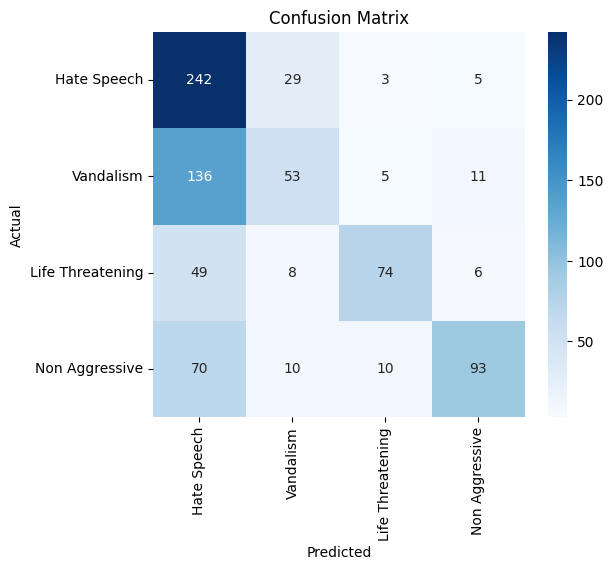

In [90]:
# Creating the confusion matrix
cm = confusion_matrix(y1_test, test_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Vandalism", "Life Threatening", "Non Aggressive"],
            yticklabels=["Hate Speech", "Vandalism", "Life Threatening", "Non Aggressive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [91]:
# Precision, Recall, and F1-Score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
precision = precision_score(y1_test, test_pred, average='weighted')
recall = recall_score(y1_test, test_pred, average='weighted')
f1 = f1_score(y1_test, test_pred, average='weighted')

print("Precision (weighted): ", precision)
print("Recall (weighted): ", recall)
print("F1-Score (weighted): ", f1)

Precision (weighted):  0.6252339094049479
Recall (weighted):  0.5746268656716418
F1-Score (weighted):  0.5572441875411621


**Random forest Classifier**

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
train_pred = rf_model.fit(X1_train,y1_train.Rate2).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  99.93872549019608
random Forest model test accuracy( in % ):  57.2139303482587


In [93]:
rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)
train_pred = rf_model.fit(X1_train,y1_train.Rate2).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  59.80392156862745
random Forest model test accuracy( in % ):  52.23880597014925


In [94]:
# rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)

# x_predicted = rf_model.fit(X_train_data,Y_train.Rate2).predict(X_train_data)
# y_predicted = rf_model.predict(X_test_data)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_data = vectorizer.fit_transform(X_train)  # Fit and transform training data
X_test_data = vectorizer.transform(X_test)        # Transform test data using the same vectorizer
#rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=8)
rf_model=RandomForestClassifier()
rf_model.fit(X_train_data, Y_train)
x_predicted = rf_model.predict(X_train_data)
y_predicted = rf_model.predict(X_test_data)
from sklearn.metrics import accuracy_score
print("Train accuracy (in %):", accuracy_score(Y_train, x_predicted) * 100)
print("Test accuracy (in %):", accuracy_score(Y_test, y_predicted) * 100)


# print("Train accuracy(in %):", accuracy_score(Y_train, x_predicted)*100)
# print("Test accuracy(in %):", accuracy_score(Y_test, y_predicted)*100)

<ipython-input-94-4fe6436ef2ca>:13: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train accuracy (in %): 99.75369458128078
Test accuracy (in %): 56.97865353037766


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
precision = precision_score(Y_test, y_predicted, average='weighted')
recall = recall_score(Y_test, y_predicted, average='weighted')
f1 = f1_score(Y_test, y_predicted, average='weighted')

print("Precision (weighted): ", precision)
print("Recall (weighted): ", recall)
print("F1-Score (weighted): ", f1)

Precision (weighted):  0.577502378029663
Recall (weighted):  0.5697865353037767
F1-Score (weighted):  0.5597972333944083


#Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix


In [97]:
# Compute confusion matrices
train_confusion_matrix = confusion_matrix(Y_train, x_predicted)
test_confusion_matrix = confusion_matrix(Y_test, y_predicted)


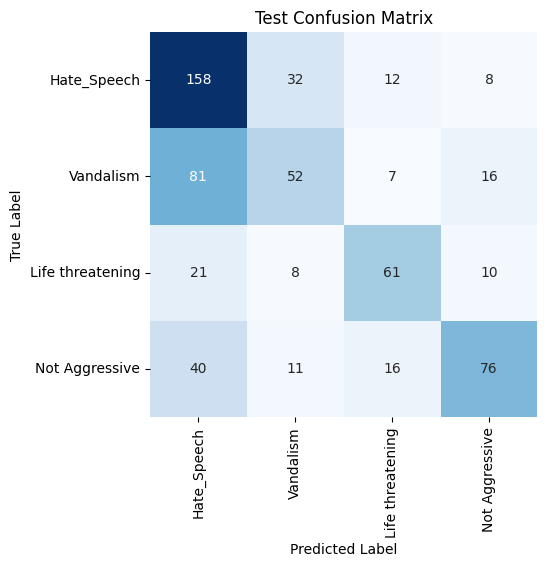

In [98]:
# labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
# plt.figure(figsize=(5,5))
# sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    #plt.figure(figsize=(8, 6))
    labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

# Plotting train confusion matrix
#plot_confusion_matrix(train_confusion_matrix, title='Train Confusion Matrix')

# Plotting test confusion matrix
plot_confusion_matrix(test_confusion_matrix, title='Test Confusion Matrix')

plt.show()


#Building, evaluating and tuning the final model

#RNN

In [99]:
print("X_train\n",X_train.head())
print("Y_train\n",Y_train.head())

print("X_test\n",X_test.head())
print("Y_test\n",Y_test.head())

X_train
 1287    শিয়ালকোলে কালী মন্দিরে প্রতিমা ভাঙার ঘটনায় ৯৯৯...
643     ইসলাম বিরোধী স্পষ্ট শর্টফিল্ম। ইসলামের বিরুদ্ধ...
1147    জনসংখ্যা গবেষণা পণ্ডিত আশীষ বসুর মতে ১৯৮০ এর দ...
1279    মুসলমানদের ঈদুল আযহা-কুরবানী এবং হিন্দু ধর্মাব...
1940    তারা বিশেষত হিন্দু সংখ্যালঘুদের আক্রমণ করে, তা...
Name: Text, dtype: object
Y_train
    Rate2
0      3
1      1
2      1
3      0
4      3
X_test
 929     জন্মগত ভাবে ধর্ম পাওয়া যায়,কিন্তু মানুষ হতে হল...
824     দেখা যায় আমরা ফেসবুকের অন্য কোথাও থেকে কপি করে...
1532    অনেক হিন্দু মহিলাকে নিষ্ঠুরভাবে ধর্ষণ করে এবং ...
1215    মিছিল ও সমাবেশগুলোতে ঢাকা থেকে ফরাসি দূতাবাস স...
504     মোহাম্মদ জাহাঙ্গীর ইসলাম, আকাশ সাহা নামের এক ফ...
Name: Text, dtype: object
Y_test
    Rate2
0      0
1      0
2      3
3      0
4      1


Tokenisation, Sequencing and Padding

In [100]:
from tensorflow.keras.preprocessing.text import Tokenizer



In [101]:
tokenizer = Tokenizer(num_words=50000,

                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='<UNK>',
                      document_count=0)

In [102]:
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(Y_train)

wordindex=tokenizer.word_index

In [103]:
tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()
#tokenizer_config['word_counts']

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [104]:
import tensorflow.keras.preprocessing.sequence as ps

In [105]:
max_length = 50
train_sequence = tokenizer.texts_to_sequences(X_train)
train_padding = ps.pad_sequences(train_sequence,maxlen=max_length,padding='post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_padding = ps.pad_sequences(test_sequence,maxlen=max_length,padding='post')

In [106]:
#print(test_padding[0])
#train_padding[0]
train_padding.shape
Y_train.shape

(2436, 1)

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
y_train = OneHotEncoder().fit_transform(Y_train)

In [109]:
#y_train.shape
y_test = OneHotEncoder().fit_transform(Y_test)
y_test.shape

(609, 4)

#Building the model

In [110]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding,Dropout, Bidirectional

from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling1D


In [111]:
# Building the BASELINE MODEL
base_model = Sequential()
base_model.add(Embedding(50000,128,input_length=train_padding.shape[1]))
base_model.add(GlobalAveragePooling1D())
base_model.add(Dense(8,activation='relu'))
base_model.add(Dense(4,activation='softmax'))

In [112]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           6400000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 6401068 (24.42 MB)
Trainable params: 6401068 (24.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
#Compiling the model

base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [114]:
y_train=np.array(y_train.toarray())

In [115]:
train_padding=np.array(train_padding)

In [116]:
#Fitting the model

history_base = base_model.fit(train_padding,y_train ,epochs=8, validation_split=0.2)

Epoch 1/8
61/61 [==============================] - 8s 110ms/step - loss: 1.3692 - accuracy: 0.3357 - val_loss: 1.3439 - val_accuracy: 0.3463
Epoch 2/8
61/61 [==============================] - 5s 85ms/step - loss: 1.3101 - accuracy: 0.3542 - val_loss: 1.2950 - val_accuracy: 0.3545
Epoch 3/8
61/61 [==============================] - 6s 93ms/step - loss: 1.1912 - accuracy: 0.4569 - val_loss: 1.2323 - val_accuracy: 0.3996
Epoch 4/8
61/61 [==============================] - 5s 86ms/step - loss: 1.0102 - accuracy: 0.5549 - val_loss: 1.1752 - val_accuracy: 0.4201
Epoch 5/8
61/61 [==============================] - 5s 83ms/step - loss: 0.8203 - accuracy: 0.6345 - val_loss: 1.1328 - val_accuracy: 0.4795
Epoch 6/8
61/61 [==============================] - 6s 103ms/step - loss: 0.6458 - accuracy: 0.7572 - val_loss: 1.0926 - val_accuracy: 0.5369
Epoch 7/8
61/61 [==============================] - 5s 81ms/step - loss: 0.4919 - accuracy: 0.8912 - val_loss: 1.0689 - val_accuracy: 0.5820
Epoch 8/8
61/61 [=

<ipython-input-117-ee71b2889356>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



(0.0, 1.4199991419911384)

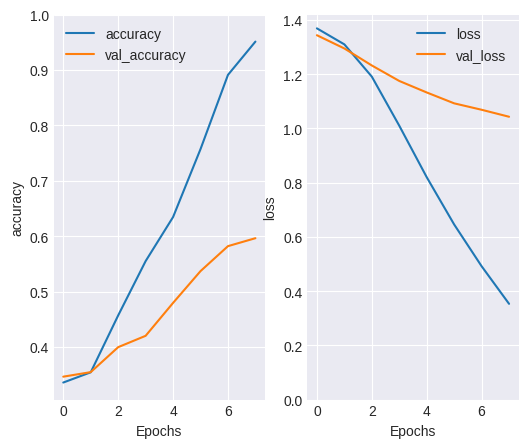

In [117]:
plt.style.use('seaborn-darkgrid')
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(6,5))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

#Handling overfitting

In [118]:
regularise = tensorflow.keras.regularizers.l2(0.001)

model_r = Sequential()
model_r.add(Embedding(50000,128,input_length=train_padding.shape[1]))
model_r.add(Dropout(0.5))
model_r.add(GlobalAveragePooling1D())
model_r.add(Dense(8,activation='relu',kernel_regularizer=regularise))
model_r.add(Dropout(0.5))
model_r.add(Dense(4,activation='softmax'))
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           6400000   
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 8)                 1032      
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                      

In [119]:
#Compiling the model
model_r.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [120]:
#Fitting the model

history_r = model_r.fit(train_padding,y_train ,epochs=8, validation_split=0.2)

Epoch 1/8
61/61 [==============================] - 11s 178ms/step - loss: 1.3945 - accuracy: 0.3244 - val_loss: 1.3867 - val_accuracy: 0.3463
Epoch 2/8
61/61 [==============================] - 7s 111ms/step - loss: 1.3769 - accuracy: 0.3619 - val_loss: 1.3704 - val_accuracy: 0.3791
Epoch 3/8
61/61 [==============================] - 5s 90ms/step - loss: 1.3530 - accuracy: 0.4251 - val_loss: 1.3416 - val_accuracy: 0.4406
Epoch 4/8
61/61 [==============================] - 6s 94ms/step - loss: 1.3069 - accuracy: 0.4738 - val_loss: 1.2890 - val_accuracy: 0.4898
Epoch 5/8
61/61 [==============================] - 5s 83ms/step - loss: 1.2237 - accuracy: 0.5359 - val_loss: 1.2306 - val_accuracy: 0.5266
Epoch 6/8
61/61 [==============================] - 5s 86ms/step - loss: 1.1302 - accuracy: 0.5734 - val_loss: 1.1795 - val_accuracy: 0.5410
Epoch 7/8
61/61 [==============================] - 6s 103ms/step - loss: 1.0415 - accuracy: 0.6191 - val_loss: 1.1483 - val_accuracy: 0.5635
Epoch 8/8
61/61 

(0.0, 1.4167690604925156)

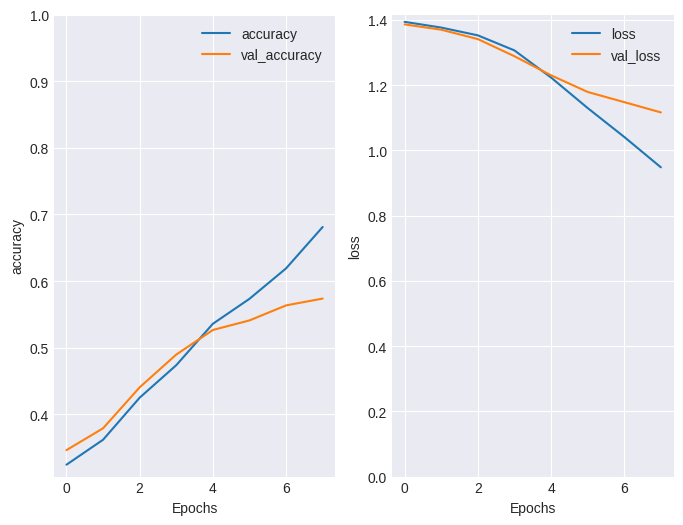

In [121]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plot_graphs(history_r, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_r, 'loss')
plt.ylim(0, None)

#Model evaluation

In [122]:
score_base =base_model.evaluate(test_padding,y_test.toarray())
print("Testing Accuracy on base_model(%): ", score_base[1]*100)
score = model_r.evaluate(test_padding,y_test.toarray())
print("Testing Accuracy on model_r(%): ", score[1]*100)

20/20 [==============================] - 0s 2ms/step - loss: 1.1369 - accuracy: 0.5599
Testing Accuracy on base_model(%):  55.99343180656433
20/20 [==============================] - 0s 2ms/step - loss: 1.1774 - accuracy: 0.5255
Testing Accuracy on model_r(%):  52.545154094696045


In [123]:
y_pred = model_r.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

20/20 [==============================] - 0s 2ms/step


In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

In [126]:
import seaborn as sn

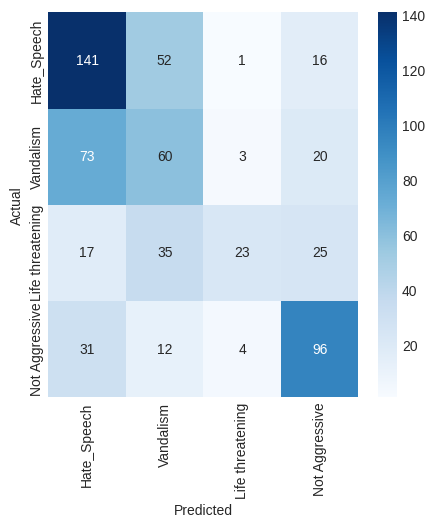

In [127]:
labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#LSTM

In [128]:
from keras.constraints import max_norm

In [129]:
#Building the model
model1 = Sequential([
    Embedding(50000,128,input_length=train_padding.shape[1]),
    Dropout(0.5),
    LSTM(32,kernel_constraint=max_norm(4)),
    Dense(32,activation='relu',kernel_regularizer=regularise),
    Dropout(0.5),
    Dense(4,activation='softmax')
])
#Compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model
history1 =  model1.fit(train_padding,y_train ,epochs=15, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/15
61/61 [==============================] - 11s 135ms/step - loss: 1.3974 - accuracy: 0.3152 - val_loss: 1.3780 - val_accuracy: 0.3463
Epoch 2/15
61/61 [==============================] - 6s 104ms/step - loss: 1.3807 - accuracy: 0.3219 - val_loss: 1.3695 - val_accuracy: 0.3443
Epoch 3/15
61/61 [==============================] - 7s 120ms/step - loss: 1.3348 - accuracy: 0.3819 - val_loss: 1.1918 - val_accuracy: 0.4652
Epoch 4/15
61/61 [==============================] - 6s 106ms/step - loss: 1.1437 - accuracy: 0.5046 - val_loss: 1.1818 - val_accuracy: 0.4734
Epoch 5/15
61/61 [==============================] - 8s 125ms/step - loss: 1.0283 - accuracy: 0.5123 - val_loss: 1.1131 - val_accuracy: 0.4836
Epoch 6/15
61/61 [==============================] - 6s 103ms/step - loss: 0.9932 - accuracy: 0.5139 - val_loss: 1.2191 - val_accuracy: 0.4549
Epoch 7/15
61/61 [==============================] - 8s 125ms/step - loss: 0.9102 - accuracy: 0.5277 - val_loss: 1.1501 - val_accuracy: 0.4693
Epoch

(0.0, 1.4244981706142426)

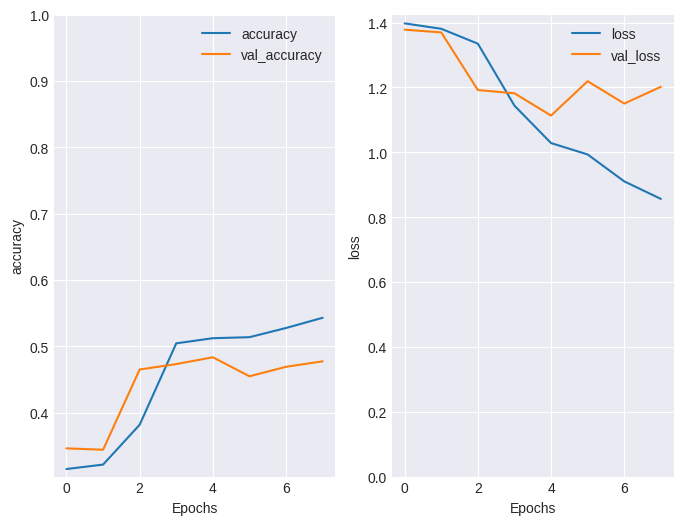

In [130]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

#Model evaluation

In [131]:
score = model1.evaluate(test_padding,y_test.toarray())
print("Testing Accuracy(%): ", score[1]*100)

20/20 [==============================] - 0s 13ms/step - loss: 1.4571 - accuracy: 0.4335
Testing Accuracy(%):  43.34975481033325


In [132]:
y_pred = model1.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])

20/20 [==============================] - 1s 7ms/step


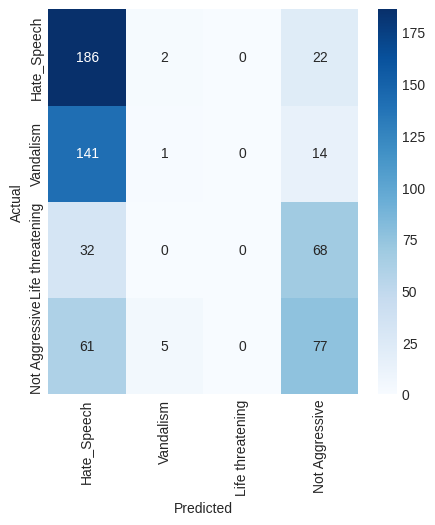

In [133]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)
labels=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

(0.0, 1.4244981706142426)

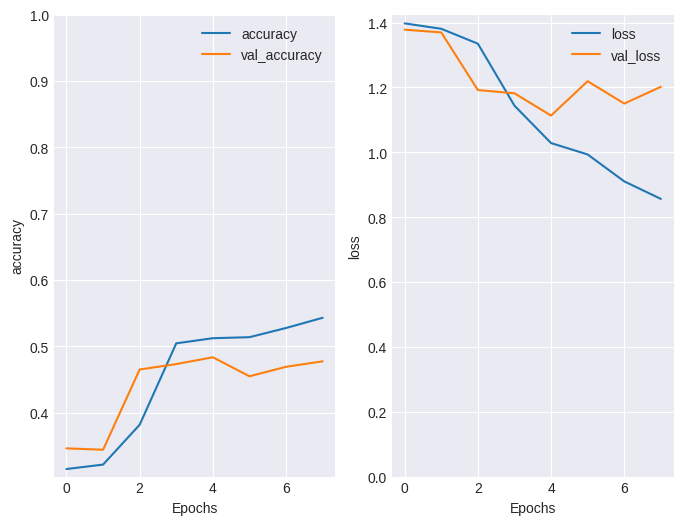

In [134]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

In [135]:
from sklearn.metrics import classification_report
print('\n=================Classification Report for Bidirectional LSTM========================\n')
print(classification_report(y_test_labels, y_predicted_labels, target_names=['Hate_Speech', 'Vandalism','Life threatening', 'Not Aggressive']))


=================Classification Report for Bidirectional LSTM========================

                  precision    recall  f1-score   support

     Hate_Speech       0.44      0.89      0.59       210
       Vandalism       0.12      0.01      0.01       156
Life threatening       0.00      0.00      0.00       100
  Not Aggressive       0.43      0.54      0.48       143

        accuracy                           0.43       609
       macro avg       0.25      0.36      0.27       609
    weighted avg       0.28      0.43      0.32       609



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Now Transformer